In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\Piyush\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X = pd.DataFrame(housing.data , columns= housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
Y = pd.DataFrame(housing.target , columns =[ 'Target'])
Y.head()

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
x_train_full , x_test , y_train_full , y_test = train_test_split(X , Y , random_state=42)
x_train , x_valid , y_train , y_valid = train_test_split(x_train_full , y_train_full , random_state=42)



In [7]:
x_train.shape

(11610, 8)

In [8]:
x_train.shape[1]

8

In [9]:
x_train.shape[1:]

(8,)

In [10]:
LAYERS = [
    tf.keras.layers.Dense(30 , activation="relu" , input_shape =x_train.shape[1:] ),
    
    tf.keras.layers.Dense(10 , activation="relu" ),
    tf.keras.layers.Dense(5 , activation="relu"  ),
    
#     Regression problem so need only one output
    tf.keras.layers.Dense(1 )
    
    
]

In [11]:
model = tf.keras.models.Sequential(LAYERS)

In [12]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(loss = LOSS , optimizer = OPTIMIZER)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [14]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
xtest = scaler.transform(x_test)


In [15]:
history = model.fit(x_train , y_train , epochs = 20 , validation_data=(x_valid , y_valid) )

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7851 - val_loss: 0.4801
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4318 - val_loss: 0.5506
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3978 - val_loss: 0.4088
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3783 - val_loss: 0.3819
Epoch 5/20
363/363 [==============================] - 0s 975us/step - loss: 0.3663 - val_loss: 0.3896
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3587 - val_loss: 0.3707
Epoch 7/20
363/363 [==============================] - 0s 973us/step - loss: 0.3528 - val_loss: 0.3565
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3503 - val_loss: 0.3459
Epoch 9/20
363/363 [==============================] - 0s 970us/step - loss: 0.3453 - val_loss: 0.3755
Epoch 10/20
363/363 [==============================] - 0s 974us/step - loss: 0.3432 - val_loss

<AxesSubplot: >

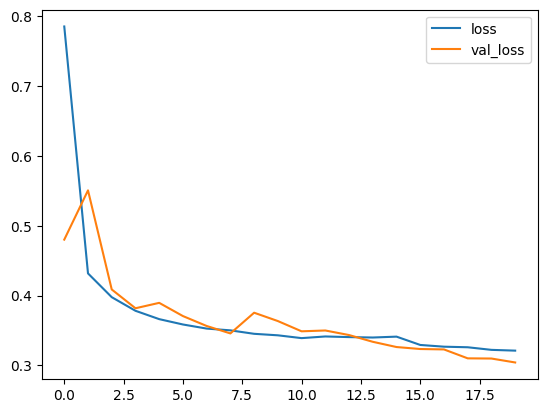

In [16]:
pd.DataFrame(history.history).plot()

In [23]:
model_2 = tf.keras.models.Sequential(LAYERS)

LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS , optimizer=OPTIMIZER)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_model.h5" , save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


history = model_2.fit(x_train , y_train , epochs = 100,validation_data=(x_valid , y_valid) , callbacks = CALLBACKS)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3087 - val_loss: 0.3016
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3084 - val_loss: 0.3010
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3082 - val_loss: 0.3008
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3081 - val_loss: 0.3012
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3077 - val_loss: 0.3013
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3076 - val_loss: 0.3005
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3074 - val_loss: 0.3000
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3072 - val_loss: 0.2997
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3068 - val_loss: 0.3013
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3066 - val_lo

<AxesSubplot: >

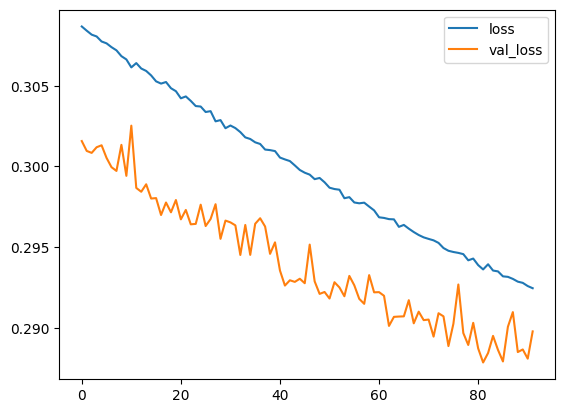

In [24]:
pd.DataFrame(history.history).plot()

In [25]:
%load_ext tensorboard

In [26]:
%tensorboard --logdir="logs"